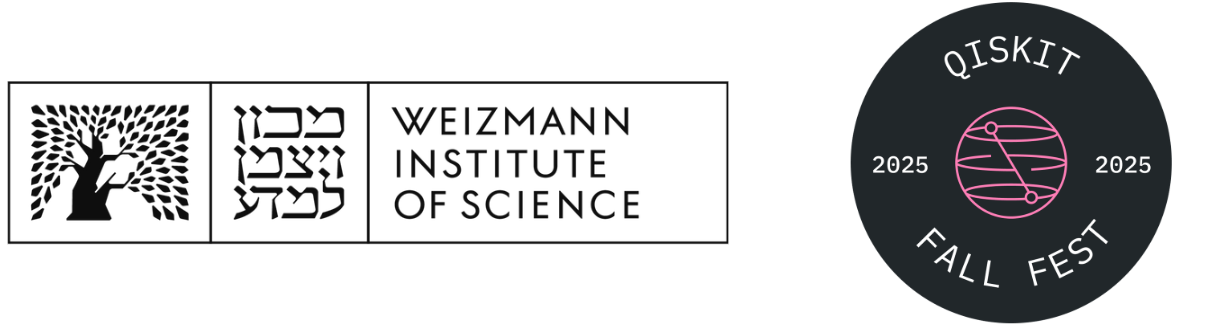

# **Qiskit Fall Fest @ Weizmann**: Qiskit Orientation Workshop
---
Welcome to the first event of **Qiskit Fall Fest @ Weizmann 2025**! In this tutorial, we will help give you a brief introduction to `qiskit`, and prepare you for the larger hackathon in December. As part of your participation, you will be required to submit your Jupyter notebook with your solutions.

Please do **not** use ChatGPT or other AI assistants, as **the goal is to enjoy the challenge, learn from it, and develop your own quantum intuition.** Good luck to all of you, and may the best quantum mind win!

In [ ]:
# Installing the required libraries

# Install Qiskit and upgrade to the latest version
%pip install qiskit --upgrade

# Install the Qiskit Aer library for simulation
%pip install qiskit qiskit-aer --upgrade

# Install Qiskit visualization tools
%pip install qiskit[visualization] --upgrade

# Install Qiskit visualization tools
%pip install qiskit_ibm_runtime

In [ ]:
# Helpful libraries
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter, ParameterVector
import qiskit.qasm3
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt

from qiskit_ibm_runtime.fake_provider import FakeVigoV2


### Example: the $X$ Gate
Our first gate to discuss in this notebook. The **$X$ (NOT) gate** is a single-qubit gate. When applied to a qubit, it will flip its state.

- When you apply $X$ gate to $|0\rangle$ the result is: $|1\rangle$.
- When you apply $X$ gate on $|1\rangle$ the result is: $|0\rangle$.

So the operation is similar to the classical NOT gate which is known as a bit-flip.

In `qiskit`, the first qubit `q0` is the top qubit line in the circuit diagram and corresponds to the LSB (least significant bit).

<IPython.core.display.Latex object>

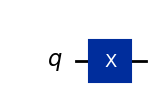

In [ ]:
# First Create our single qubit Quantum Circuit
qc = QuantumCircuit(1)

# Apply X gate on qubit one (indexed as 0) → flip the state from |0⟩ to |1⟩
qc.x(0)

# Display the resulting statevector
sv = Statevector.from_instruction(qc)
display(sv.draw("latex"))

# Draw the circuit
qc.draw('mpl')

### Example: the $H$ Gate
The Hadamard ($H$) gate is one of the most important single-qubit gates in quantum computing. It creates a *superposition* of the computational basis states.
- When you apply the $H$ gate to $|0\rangle$, the result is $$H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$$
- When you apply the $H$ gate to $|1\rangle$, the result is $$H|1\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}$$

Thus, it transforms basis states into equal superpositions, enabling quantum parallelism.

In `qiskit`, qubit `q0` again represents the top wire (least significant bit).

In [ ]:
# Create a single-qubit quantum circuit
qc = QuantumCircuit(1)

# Apply H gate to qubit 0 → put |0⟩ into superposition
qc.h(0)

# Display the resulting statevector
sv = Statevector.from_instruction(qc)
display(sv.draw("latex"))

# Draw the circuit
qc.draw('mpl')

### Example: the $\rm{CNOT}$ Gate
The **Controlled-NOT (CNOT)** gate is a two-qubit gate and is fundamental for generating *entanglement*. It flips the *target* qubit only if the *control* qubit is in state $|1\rangle$.

| Control (input) | Target (input) | Target (output) |
| :-------------: | :------------: | :-------------: |
|        0        |        0       |        0        |
|        0        |        1       |        1        |
|        1        |        0       |        1        |
|        1        |        1       |        0        |


Mathematically, the CNOT gate performs the operation:
$$ |c,t\rangle \to |c, c\oplus t\rangle $$

In `qiskit`, qubit `q0` is the control (top line), and `q1` is the target (bottom line). The CNOT is called using `QuantumCircuit.cx(control, target)`.

In [ ]:
# Create a two-qubit quantum circuit
qc = QuantumCircuit(2)

# Apply a Hadamard to the control to create superposition
qc.h(0)

# Apply CNOT with control=0, target=1
qc.cx(0, 1)

# Display the resulting statevector
sv = Statevector.from_instruction(qc)
display(sv.draw("latex"))

# Draw the circuit
qc.draw('mpl')

# Assignment 1: Construct the Four Bell States
---

**Bell states** are fundamental to quantum computing because they represent the simplest and most ideal form of **quantum entanglement**. Many quantum algorithms and protocols -- such as quantum teleportation, superdense coding, and error correction -- rely directly on these maximally entangled states. They also serve as essential test cases for verifying quantum hardware, checking gate fidelity, and demonstrating non-classical behavior like Bell inequality violations. Understanding how to construct and manipulate Bell states is therefore a key step toward mastering quantum information processing.

Using quantum circuits, construct the four Bell states:

$$
|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}, \quad
|\Phi^-\rangle = \frac{|00\rangle - |11\rangle}{\sqrt{2}}, \quad
|\Psi^+\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}}, \quad
|\Psi^-\rangle = \frac{|01\rangle - |10\rangle}{\sqrt{2}}
$$

**Tasks:**

1. **Construct and analyze each Bell state.** For each state,
   - **1a.** Print the state vector after applying the quantum circuit.  
   - **1b.** Print the operators that generate this quantum circuit.  
   - **1c.** Use the Aer simulator to measure the results and print the histogram of the results (for 1000 shots).

In [ ]:
# Write your code here for "psi+" ...............
# make sure the circuit is called qc and the state vector sv



# end of your code ...............

# Draw the circuit
display(sv.draw("latex"))
qc.draw('mpl')

In [ ]:
# Write your code here for "psi-" ...............
# make sure the circuit is called qc and the state vector sv





# end of your code ...............

# Draw the circuit
display(sv.draw("latex"))
qc.draw('mpl')

In [ ]:
# Write your code here for "phi+" ...............
# make sure the circuit is called qc and the state vector sv





# end of your code ...............

# Draw the circuit
display(sv.draw("latex"))
qc.draw('mpl')

In [ ]:
# Write your code here for "phi-" ...............
# make sure the circuit is called qc and the state vector sv





# end of your code ...............

# Draw the circuit
display(sv.draw("latex"))
qc.draw('mpl')

# Assignment 2A: Superposition and Bloch Sphere Rotations
---
Gates like $R_X$, $R_Y$, and $R_Z$ perform rotations around the axes of the Bloch sphere, creating **superposition states**. A rotation by an angle $\theta$ around the Y-axis, $R_Y(\theta)$, on an initial state $|0\rangle$ produces the superposition state $\cos(\theta/2)|0\rangle + \sin(\theta/2)|1\rangle$. The probabilities of measuring 0 or 1 are the squares of these amplitudes.

**Tasks:**

Write code that performs the following functionality:
1. Creates a quantum circuit that contains one qubit.
2. Applies a single gate to qubit 0 (initially in state $|0\rangle$) to create a superposition where the probability of measuring $|0\rangle$ is approximately 18% and the probability of measuring $|1\rangle$ is 82%.
3. Prints the probabilities.
4. Displays a Bloch sphere representation of the statevector.


In [ ]:
# Your code here...............


# Target probabilities
p0 =
p1 =


# generate quantum circuit "qc"





# end of your code ...............


# Draw the bloch sphere
state = Statevector.from_instruction(qc);
plot_bloch_multivector(state, title="Bloch Sphere")


# Assignment 2B: Find the rotation on the Bloch Sphere Representation
---
The **Bloch sphere** is one of the most important and elegant representations of a qubit because it provides a complete geometric picture of any single-qubit pure state. Every point on the sphere corresponds to a valid qubit state, allowing us to visualize superposition, relative phase, and the effect of quantum gates as simple rotations. Instead of thinking in abstract vectors or complex amplitudes, the Bloch sphere turns qubit behavior into intuitive geometry, making concepts like interference, coherence, and measurement much easier to understand. For this reason, it is widely used in quantum computing, quantum control, and quantum education as the most natural and insightful way to visualize the physics of a qubit.

**Task:**
- Build the correct quantum circuit to match the bloch sphere given in:

 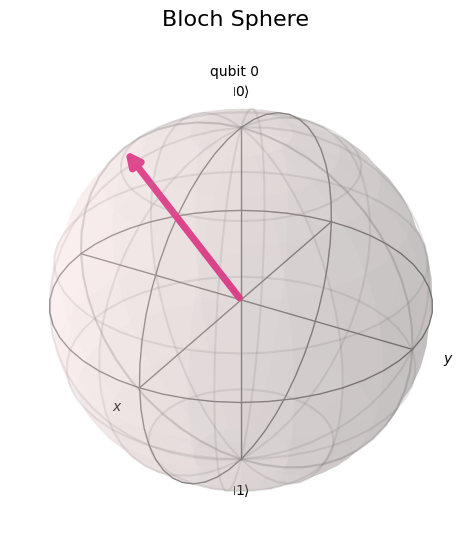

In [ ]:
# Your code here...............

# generate quantum circuit "qc"

qc = QuantumCircuit(1)
# qc.h(0)
qc.rx(np.pi/2,0)



# end of your code ...............


# Draw the bloch sphere
state = Statevector.from_instruction(qc);
plot_bloch_multivector(state, title="Bloch Sphere")

# Assignment 3A: Oracles
---

In quantum computing, oracles are crucial conceptual tools. They let us treat complex functions as "black boxes" that a quantum algorithm can query in superposition. This mathematical concept focuses our attention on how quantum mechanical principles, such as *interference*, *entanglement*, and *parallel evaluation* can lead to computational speed-ups. Many foundational quantum algorithms are defined entirely in terms of how they interact with an oracle, making the concept central to the theory of quantum speed-ups.

An oracle for a classical function, $f: \{0,1\}^n \mapsto \{0,1\}^m$, is a unitary $U_f$ that implements the function **reversibly** on quantum registers. The standard form is
$$U_f: |x\rangle |y\rangle \mapsto |x\rangle |y \oplus f(x)\rangle$$

where $x$ is the input register (with $n$ qubits), and $y$ is an output/ancilla register with ($m$ qubits), and $\oplus$ denotes the bitwise XOR.

This is unitary and reversible because XOR is invertible when you know $x$.

### Example 1: constant function, single-bit

Let's take the function $f_1(x)=1$. This function outputs 1 no matter the input $x$ (taken from $\{0,1\}^1$). This is an example of a constant function.

The needed oracle is:
$$ U_f|x\rangle |y\rangle \mapsto |x\rangle |y \oplus 1 \rangle = |x\rangle |\bar{y}\rangle $$

The oracle that implement this function is just an $X$ gate acting on the target ancilla $y$.

```
# Example 1

# 1 input qubit + 1 output qubit
qc = QuantumCircuit(2)  # qubit 0: input x, qubit 1: ancilla y
qc.x(1)   # NOT
```

**Tasks:**
1. Write code that produces the oracle for the function $f(x)=x$, i.e. the identity function. The function takes in a single qubit, and outputs a single qubit.
2. Write code that produces the oracle for the function $f(x)=\bar{x}$, i.e. the anti-identity function. This means that $f(0)=1$ and $f(1)=0$. The function takes in a single qubit, and outputs a single qubit. Be careful to change only the target ancilla qubit.

In [ ]:
# write your code here ................


# end of your code ...............
print(qc)

# Assignment 3B: Oracles
---

### Example 2: two-bit function, the Parity Oracle

Define $f(x_1,x_2) = x_1 \oplus x_2$. The domain is $\{0,1\}^2 \mapsto \{0,1\}$. This function is an example of a balanced function which means it outputs equal amounts of $0$ and $1$ when given different inputs.

Which means we need:

$$U_f|x_1, x_2 \rangle |y\rangle \to |x_1,x_2⟩|y \oplus (x_1 \oplus x_2)⟩=|x\rangle |y \oplus x_1 \oplus x_2 \rangle$$

In this case, the target ancilla is flipped when the inputs are not the same (either `01` or `10`), and is not flipped when both inputs are the same (either `00` or `11`).

Thus, the oracle implements CNOTs from each input qubit to the single ancilla output.

```
# Example 2

# qubits: q0 = x1, q1 = x2, q2 = ancilla y
qc = QuantumCircuit(3, name='U_f_parity')
qc.cx(0, 2)   # y <- y XOR x1
qc.cx(1, 2)   # y <- y XOR x2
```

**Tasks:**
1. Write code that produces the oracle for the function $f(x_1,x_2)=x_1 \wedge x_2$, also known as the AND operation. The ancilla flips only if both inputs are $1$. The function takes in two qubits, and outputs a single qubit.
2. Write code that produces the oracle for the function $f(x_1,x_2)=x_1 \lor x_2$, also known as the OR operation. The ancilla flips if at least one input is $1$. The function takes in two qubits, and outputs a single qubit.
3. **Phase oracle:** turning the ancilla-flip oracle into a phase flip: In this question, we want $|x \rangle \to (-1)^{f(x)}|x\rangle $.
    - If $f(x)=0$, nothing happens, i.e. $|x\rangle \to |x\rangle$
    - If $f(x)=1$, the state picks up a minus sign, i.e. $|x\rangle \to -|x\rangle$

    **3A**. Start the input qubit in all possible states:$|0⟩, |1⟩, |+\rangle = (|0⟩+|1⟩)/\sqrt{2}$ and see how the result differs.
    
    **3B**. Start by creating the oracle by preparing the **ancilla** qubit in the $ |-\rangle = (|0\rangle - |1\rangle)/\sqrt(2)$

    **3C**. Apply standard oracle: XOR the ancilla with $f(x)$: choose once a constant function and once a balanced function from above, apply them and discuss the different results.


In [ ]:
# write your code here ................


# end of your code ...............
print(qc)

In [ ]:
# write your code here ................


# end of your code ...............
print(qc)

In [ ]:
# Phase oracle

qc = QuantumCircuit(2)
x, anc = 0, 1

# Put input once into |0>, second into |1> and third into superposition of them

# Prepare ancilla into |->


# State before oracle
sv_before = Statevector.from_instruction(qc)

# Apply oracle once for balanced, and then once for constant function



# State after oracle
sv_after = Statevector.from_instruction(qc)

print("Before oracle:")
display(sv_before.draw("latex"))
print("After oracle:")
display(sv_after.draw("latex"))



Before oracle: Statevector([ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

After oracle: Statevector([-0.70710678+0.j,  0.        +0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


# Assignment 4A: My First Quantum Algorithm -- Defining the Oracle
---

Now, using the oracle knowledge developed in Assignment 3, we can dive into the first historically important quantum algorithm: the Deutsch-Jozsa algorithm. While somewhat impractical on its own, it is the perfect training ground for understanding how quantum oracles enable exponential reductions in query complexity. Grasping Deutsch-Jozsa builds the conceptual muscles needed to understand far more powerful algorithms most notably Shor's algorithm, the quantum algorithm capable of breaking RSA by factoring large integers exponentially faster than classical computers.

For the Deutsch-Jozsa algorithm, we work with a special kind of "black-box" function (oracle). This oracle takes an $n$-qubit input and returns either $0$ or $1$:

$$ f:\{ 0,1\}^n→\{0,1\} $$

We are guaranteed that this oracle is one of two types -- constant or balanced:

- **Constant Oracle:** The output is always the same, no matter what input you give it. In other words, $f(x)=0$ for all $x$, or $f(x)=1$ for all $x$ (where $x\in\{0,1\}\subset \mathbb{Z}$).

- **Balanced Oracle:** The oracle gives $0$ for exactly half of the possible inputs and $1$ for the other half. So if there are $2^n$ inputs, then $2^{n-1}$ of them map to $0$ and $2^{n-1}$ map to $1$.


The goal of the Deutsch-Jozsa algorithm is simply to decide which type of oracle we are dealing with -- constant or balanced -- using the power of quantum computation to do it in just one query, something a classical computer cannot do efficiently.

**Tasks:**
1. Write an oracle whose first case is a balanced function like you learned in the previous assigment.
2. Write for the second case a constant function.

In [ ]:
# Step 1: Creating the Quantum Oracle.
def twobit_function(case: int):
    f = QuantumCircuit(2)
    if case==1: # Balanced function just like you learned in assignment 3
    # write your quantum circuit for balanced function here......








    # end of your balanced function here.............
    if case==2: # Constant function just like you learned in assginment 3
    # write your quantum circuit for Constant function here......









    # end of your Constant function here...........
    return f

qc = QuantumCircuit(2)
qc.h(0)
qc.barrier()
qc.compose(twobit_function(1), inplace=True)
qc.measure_all()


qc.draw("mpl")

In [ ]:
# please run this script

# Load the backend sampler
from qiskit.primitives import BackendSamplerV2

# Load the Aer simulator and generate a noise model based on the currently-selected backend.
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

# Alternatively, load a fake backend with generic properties and define a simulator.
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
backend = FakeBrisbane()
noise_model = NoiseModel.from_backend(backend)

# Define a simulator using Aer, and use it in Sampler.
backend_sim = AerSimulator(noise_model=noise_model)
sampler_sim = BackendSamplerV2(backend=backend_sim)

# Assignment 4B: Write the Deutsch-Jozsa Algorithm and Determine the State of the Oracle
---
The Deutsch-Josza algorithm goes as follows:

The input qubit is prepared in $|0\rangle$ and the ancilla qubit in $|1\rangle$, and then both are put into a superposition using Hadamard gates. The oracle $U_f$ is applied, which flips the phase of the input qubit's amplitude when $f(x)=1$, effectively encoding the function's behavior as a *phase kickback* on the input qubit. Finally, applying another Hadamard to the input qubit and measuring this tells us whether the function is constant (measurement gives 0) or balanced (measurement gives 1).

**Task:**

Implement the Deutsch-Jozsa algorithm in the code below.

1. Start your first qubit in the superposition plus state $|+\rangle=(|0\rangle + |1\rangle)/\sqrt{2}$
2. Start your second qubit in the superposition minus state $|-\rangle =(|0\rangle -|1\rangle)/\sqrt{2}$

In [ ]:
## Deutsch's algorithm:

## Step 1: Map the problem
oracle_state = 1;

# first, convert oracle circuit (above) to a single gate for drawing purposes.
# otherwise, the circuit is too large to display
blackbox = twobit_function(oracle_state).to_gate()  # you may edit the number 1 or 2 inside "twobit_function()" to select among the four valid functions
blackbox.label = "$U_f$"


qc_deutsch = QuantumCircuit(2, 1)

# write your code here...............................................................
# Transform your first qubit into plus state and second to minus state here......






#........................................
# end of writing code...............................................................

# Dont change the code here.......................................
# applying the Oracle......................
qc_deutsch.barrier()
qc_deutsch.compose(twobit_function(oracle_state), inplace=True)
qc_deutsch.barrier()
#.................................................................................

# write your code here............................
# Hint: you need to do another gate operation on the qubit before you measure to see the correct results of balanced or constant






# end of your code..............................
qc_deutsch.measure(0, 0)
qc_deutsch.draw("mpl")

In [ ]:
# Step 2: Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa = pm.run(qc_deutsch)

# Step 3: Run the job on simulation
job = sampler_sim.run([qc_isa], shots=1) # uncomment this line to run on simulator instead
res = job.result()
counts = res[0].data.c.get_counts()

# Step 4: Visualize and analyze results
## Analysis
print(counts)
if "1" in counts:
    print("balanced")
else:
    print("constant")